In [102]:
import os
import matplotlib.pyplot as mplot;
import statistics as st

from cmdstanpy import cmdstan_path, CmdStanModel

In [103]:
stan_file = os.path.join(cmdstan_path(), 'examples', 'bernoulli', 'bernoulli.stan')


In [104]:
model = CmdStanModel(stan_file=stan_file)

INFO:cmdstanpy:found newer exe file, not recompiling


In [105]:
print(model)

CmdStanModel: name=bernoulli
	 stan_file=/Users/piotrszyller/.cmdstan/cmdstan-2.29.1/examples/bernoulli/bernoulli.stan
	 exe_file=/Users/piotrszyller/.cmdstan/cmdstan-2.29.1/examples/bernoulli/bernoulli
	 compiler_options=stanc_options={}, cpp_options={}


In [106]:
print(model.exe_info())

{'stan_version_major': '2', 'stan_version_minor': '29', 'stan_version_patch': '1', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [107]:
d={
    "N" : 13,
    "y" : [0,0,0,0,0,1,1,1,1,1,1,1,1]
}

In [108]:
fit = model.sample(data=d)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [109]:
print(fit)

CmdStanMCMC: model=bernoulli chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_1.csv
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_2.csv
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_3.csv
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_4.csv
 output_files:
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_0-stdout.txt
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_1-stdout.txt
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_2-stdout.txt
	/var/folders/h2/2g0kcf496m9_vc4gsrb0v0g00000gn/T/tmp8kcidarr/bernoulli-20220307214325_3-stdout.txt


In [110]:
draws_theta = fit.stan_variable(var='theta')

In [111]:
draws_theta.shape

(4000,)

Text(0.5, 0, 'theta')

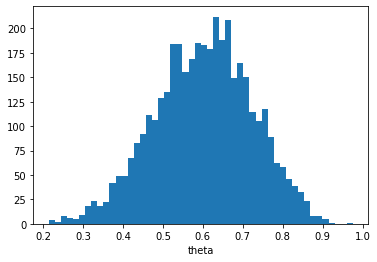

In [112]:
mplot.hist(draws_theta,bins=50)
mplot.xlabel('theta')

In [113]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-11.0,0.0190,0.75,-12.0,-10.00,-10.0,1600.0,11000.0,1.0
theta,0.6,0.0034,0.12,0.4,0.61,0.8,1300.0,9100.0,1.0


In [114]:
st.median(draws_theta)

0.6066235

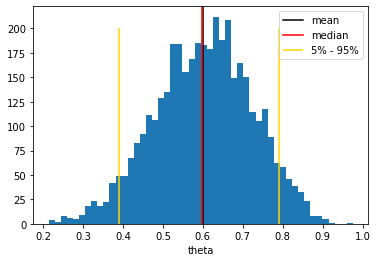

In [115]:
mplot.hist(draws_theta,bins=50)
mplot.xlabel('theta')
mplot.axvline(x=0.6, color='black',label='mean')
mplot.axvline(x=0.598267, color='red',label='median')
mplot.vlines([0.39, 0.79], ymin=0, ymax=200, color='gold', label='5% - 95%')
mplot.legend()